In [1]:
import pandas as pd
import numpy as np

# 读取CSV文件
df = pd.read_csv('./all_data.csv')

# 查看数据基本信息
print('数据基本信息：')
df.info()

# 查看数据前几行
print('\n数据前几行：')
print(df.head())

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   speed    1800 non-null   float64
 1   taste    1800 non-null   float64
 2   service  1800 non-null   float64
 3   label    1800 non-null   object 
dtypes: float64(3), object(1)
memory usage: 56.4+ KB

数据前几行：
      speed     taste   service label
0 -0.175295  0.985157  0.289595     G
1  0.795636  0.540165  0.554798     G
2  0.076925  0.122191  0.948583     G
3 -0.127867  0.494316  0.201424     G
4  0.512485  0.985157  0.371250     G


In [2]:
# 查看三个维度的描述性统计信息
print('三个维度的描述性统计信息：')
print(df[['speed', 'taste', 'service']].describe())

三个维度的描述性统计信息：
             speed        taste      service
count  1800.000000  1800.000000  1800.000000
mean     -0.028721     0.136664     0.002190
std       0.345023     0.510550     0.572525
min      -0.985157    -0.994558    -0.985157
25%      -0.293751    -0.329318    -0.496094
50%      -0.055982     0.137209    -0.058244
75%       0.222851     0.580366     0.454979
max       0.975753     0.999567     0.997712


In [3]:
from scipy import stats

# 对三个维度分别进行Shapiro-Wilk正态性检验
print('Shapiro-Wilk正态性检验结果：')

# speed维度
stat_speed, p_speed = stats.shapiro(df['speed'])
print(f'speed维度: 统计量={stat_speed:.6f}, p值={p_speed:.6f}')

# taste维度
stat_taste, p_taste = stats.shapiro(df['taste'])
print(f'taste维度: 统计量={stat_taste:.6f}, p值={p_taste:.6f}')

# service维度
stat_service, p_service = stats.shapiro(df['service'])
print(f'service维度: 统计量={stat_service:.6f}, p值={p_service:.6f}')

Shapiro-Wilk正态性检验结果：
speed维度: 统计量=0.988025, p值=0.000000
taste维度: 统计量=0.951910, p值=0.000000
service维度: 统计量=0.942390, p值=0.000000


distribution_analysis.png


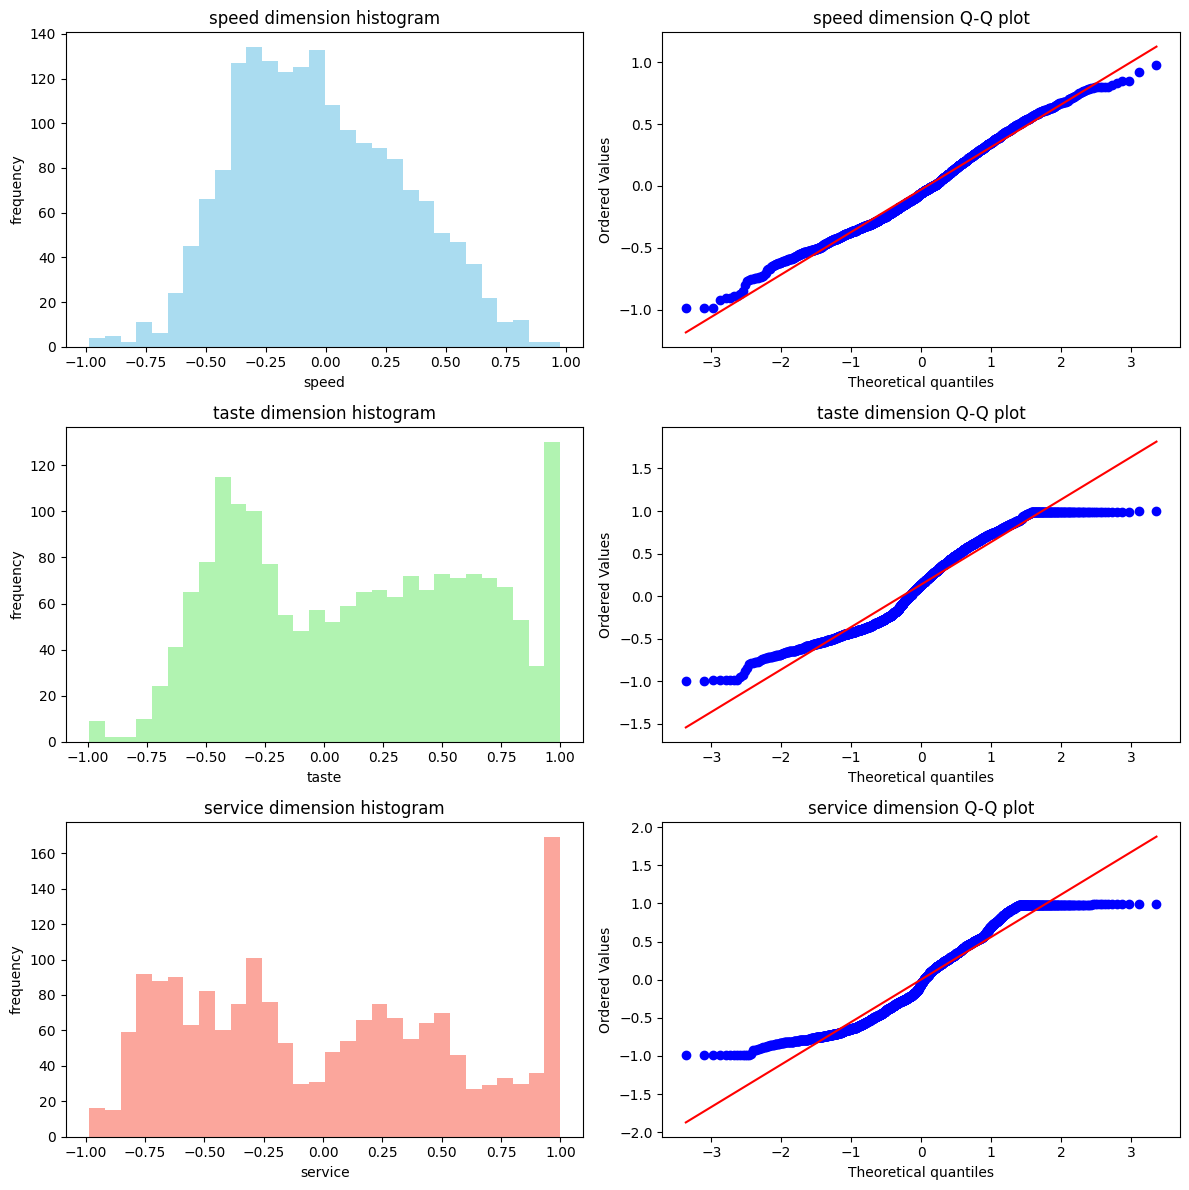

In [4]:
import matplotlib.pyplot as plt

# 创建图形
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# speed维度的直方图和Q-Q图
axes[0, 0].hist(df['speed'], bins=30, alpha=0.7, color='skyblue')
axes[0, 0].set_title('speed dimension histogram')
axes[0, 0].set_xlabel('speed')
axes[0, 0].set_ylabel('frequency')

stats.probplot(df['speed'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('speed dimension Q-Q plot')

# taste维度的直方图和Q-Q图
axes[1, 0].hist(df['taste'], bins=30, alpha=0.7, color='lightgreen')
axes[1, 0].set_title('taste dimension histogram')
axes[1, 0].set_xlabel('taste')
axes[1, 0].set_ylabel('frequency')

stats.probplot(df['taste'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('taste dimension Q-Q plot')

# service维度的直方图和Q-Q图
axes[2, 0].hist(df['service'], bins=30, alpha=0.7, color='salmon')
axes[2, 0].set_title('service dimension histogram')
axes[2, 0].set_xlabel('service')
axes[2, 0].set_ylabel('frequency')

stats.probplot(df['service'], dist="norm", plot=axes[2, 1])
axes[2, 1].set_title('service dimension Q-Q plot')

plt.tight_layout()
plt.savefig('distribution_analysis.png')
print('distribution_analysis.png')